# MinMax Problem

This is a variation of shortest path.

Given an acyclic graph **G** with weighted edges, the shortest path problem is to find the path from source s to target t whose weighted length is minimal.

Each path is a sequence of edges, and its length is the sum of the weights
of the edges in the path.

The maximal link in any path is the maximum of the weights of the edges in the path.

The MINMAX problem is to find the path from s to t whose maximal link is minimal.

* find $f(1,0)$

$f(k,i) = \min \limits_j \left \{ \max \left \{  b(i,j), f(k+1, j) \right \}  \right \}$

Base conditions:  
$f(N-1, i) = b(i, N)$

<span style="color:red">The implementation considers that:</span>
* <span style="color:red">the source node has index 0 and </span>
* <span style="color:red">destination node has index N-1</span>

In [1]:
import numpy as np
import networkx as nx

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [19, 9]
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## to draw the graphs

In [3]:
def create_graph(B):
    G=nx.DiGraph()
    for i in range(B.shape[0]):
        for j in range(B.shape[1]):
            if not np.isinf(B[i, j]):
                G.add_edge(i, j, weight=B[i, j])
    return G

In [4]:
def draw_graph(B):
    plt.figure(1, figsize=(16, 9))
    G=create_graph(B)
    pos=nx.spring_layout(G)  # random_layout(G)
    
    ax = plt.gca()
    
    _ = nx.draw_networkx(G, pos, ax=ax, font_size=20,
                         node_size=500,
                         node_color="yellow")
    labels = nx.get_edge_attributes(G, 'weight')
    _ = nx.draw_networkx_edge_labels(G, pos, ax=ax, edge_labels=labels, font_size=20)  

    plt.show()

# Minimum Maximum implementation

In [5]:
def minimum_maximum(G, verbose=False):
    N = B.shape[0]

    # auxiliar 
    f = np.zeros((N - 1, N))
    # base case
    for i in range(N):
        f[N - 2, i] = B[i,N - 1]
    
    max_k = N - 3
    for k in range(max_k, -1, -1):
        for i in range(N):
            _m = [max(B[i, j], f[k + 1, j]) for j in range(N)]
            f[k, i] = np.min(_m)
        # check if processed the line with the source
        if not np.isinf(f[k, 0]) and np.all(f[k, 1:]):
            break
    
    if True:
        # final matrix
        print(f[k:, :])
    return f[k, 0]

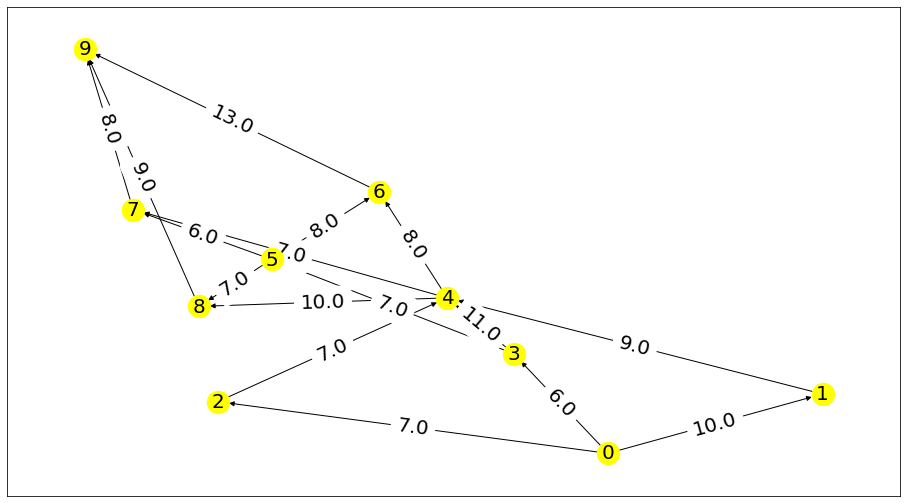

In [6]:
B = np.array([[np.inf, 10, 7, 6, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, ],
     [np.inf, np.inf, np.inf, np.inf, 9, np.inf, np.inf, np.inf, np.inf, np.inf, ],
     [np.inf, np.inf, np.inf, np.inf, 7, np.inf, np.inf, np.inf, np.inf, np.inf, ],
     [np.inf, np.inf, np.inf, np.inf, 11, 7, np.inf, np.inf, np.inf, np.inf, ],
     [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, 8, 7, 10, np.inf, ],
     [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, 8, 6, 7, np.inf, ],
     [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, 13, ],
     [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, 8, ],
     [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, 9, ],
     [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, ],
     ])
draw_graph(B)

In [7]:
minimum_maximum(B)

[[ 8. inf inf inf inf inf inf inf inf inf]
 [inf  9.  8.  8. inf inf inf inf inf inf]
 [inf inf inf inf  8.  8. inf inf inf inf]
 [inf inf inf inf inf inf 13.  8.  9. inf]]


8.0

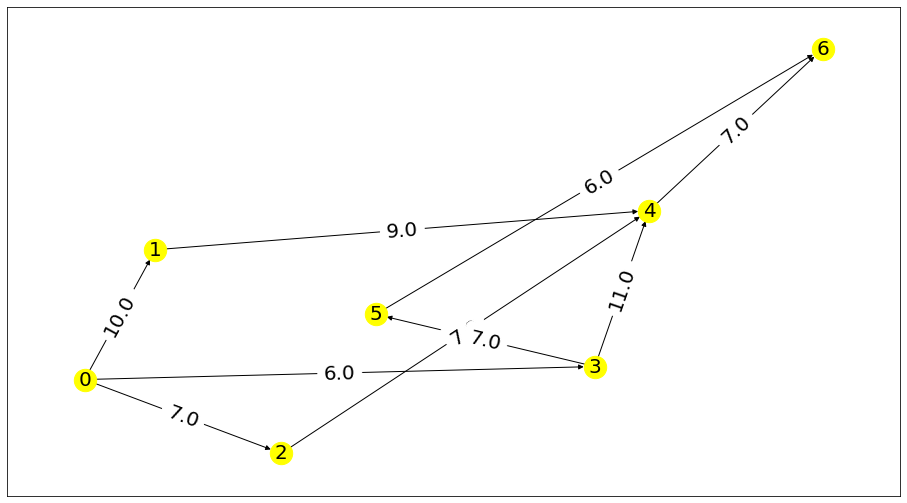

In [9]:
B = np.array([[np.inf, 10, 7, 6, np.inf, np.inf, np.inf],
     [np.inf, np.inf, np.inf, np.inf, 9, np.inf, np.inf],
     [np.inf, np.inf, np.inf, np.inf, 7, np.inf, np.inf],
     [np.inf, np.inf, np.inf, np.inf, 11, 7, np.inf],
     [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, 7],
     [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, 6],
     [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf],
     ])
draw_graph(B)

In [10]:
minimum_maximum(B)

[[ 7. inf inf inf inf inf inf]
 [inf  9.  7.  7. inf inf inf]
 [inf inf inf inf  7.  6. inf]]


7.0

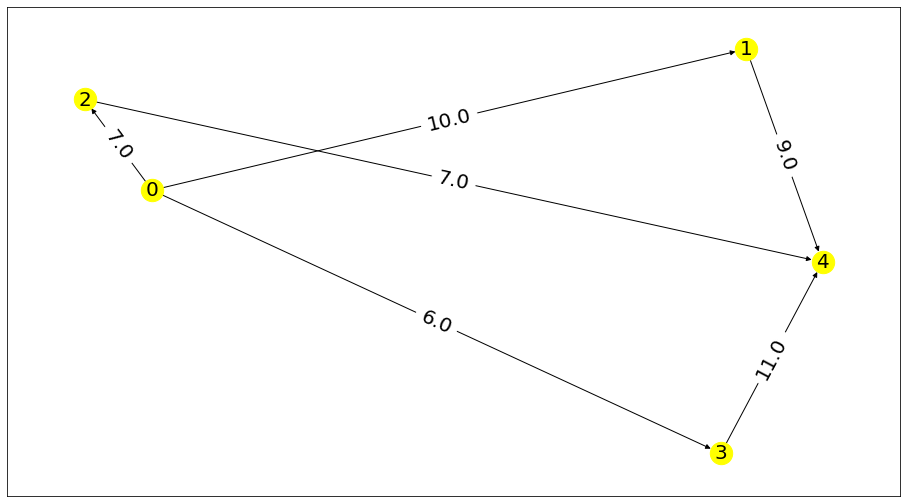

In [11]:
B = np.array([[np.inf, 10, 7, 6, np.inf],
     [np.inf, np.inf, np.inf, np.inf, 9],
     [np.inf, np.inf, np.inf, np.inf, 7],
     [np.inf, np.inf, np.inf, np.inf, 11],
     [np.inf, np.inf, np.inf, np.inf, np.inf],
     ])
draw_graph(B)

In [12]:
minimum_maximum(B)

[[ 7. inf inf inf inf]
 [inf  9.  7. 11. inf]]


7.0

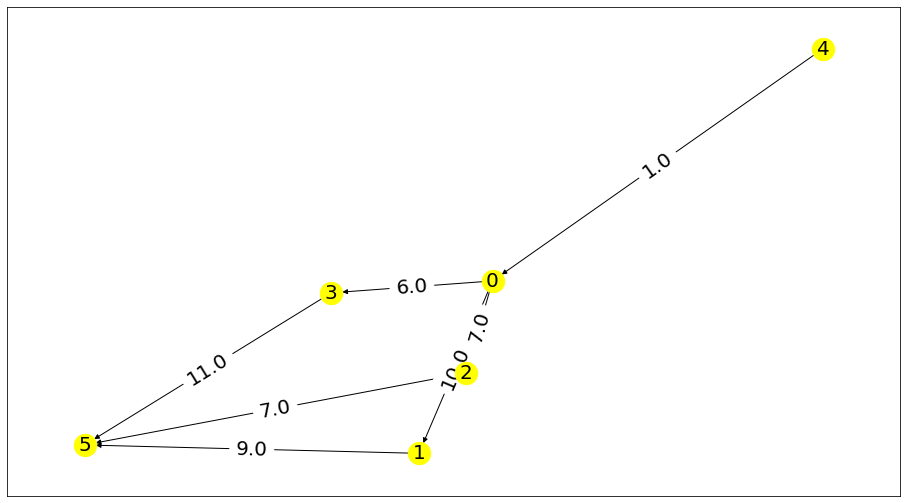

In [13]:
# add a node that points to the origin
B = np.array([[np.inf, 10, 7, 6, np.inf, np.inf],
     [np.inf, np.inf, np.inf, np.inf, np.inf, 9],
     [np.inf, np.inf, np.inf, np.inf, np.inf, 7],
     [np.inf, np.inf, np.inf, np.inf, np.inf, 11],
     [1, np.inf, np.inf, np.inf, np.inf, np.inf],
     [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf],
     ]) 
draw_graph(B)

In [14]:
minimum_maximum(B)

[[ 7. inf inf inf inf inf]
 [inf  9.  7. 11. inf inf]]


7.0